# Linear Discriminant Analysis (LDA) on Wine Dataset

## Introducción

El Análisis Discriminante Lineal (LDA, por sus siglas en inglés) es una técnica de aprendizaje supervisado utilizada principalmente para la clasificación y reducción de dimensiones en conjuntos de datos. Su objetivo es encontrar la combinación lineal de variables predictoras que mejor discrimine entre dos o más clases diferentes.

En otras palabras, busca proyectar los datos en un espacio de menor dimensión mientras maximiza la separación entre las clases. Es una herramienta poderosa en la estadística y el aprendizaje automático para abordar problemas de clasificación y visualización de datos.


 A diferencia de otros métodos como la Regresión Logística o SVM, LDA se basa en la suposición de que los datos siguen una distribución normal y que las clases comparten la misma matriz de covarianza.

## ¿Cómo funciona matemáticamente?

LDA busca maximizar la razón de varianza entre clases (separación entre clases) y minimizar la varianza dentro de las clases (dispersión dentro de cada clase). Esto se logra proyectando los datos en un espacio de menor dimensionalidad donde las clases están bien separadas.

Objetivo: Encontrar un vector de proyección $w$ que maximice la función objetivo:



$ J(w) = \frac{w^T S_B w}{w^T S_W w} $

Donde:

- $ w $ es el vector de pesos.
- $ S_B $ es la matriz de dispersión entre clases.
- $ S_W $ es la matriz de dispersión dentro de las clases.

Resultado: LDA proyecta los datos en un espacio de
$ C − 1$ dimensiones, donde  $C$ es el número de clases



## Diferencia con otros métodos

**Regresión Logística:** LDA asume que los datos siguen una distribución normal y que las clases comparten la misma covarianza, mientras que la Regresión Logística no hace estas suposiciones.

**SVM:** SVM busca maximizar el margen entre clases, mientras que LDA maximiza la separación entre las medias de las clases.

## Aplicación a Finanzas

1. **Clasificación de clientes según su nivel de riesgo:** LDA puede utilizarse para clasificar a los clientes en categorías de riesgo (bajo, medio, alto) basándose en características financieras como ingresos, deuda, historial crediticio, etc.

2. **Detección de fraude:** LDA puede ayudar a identificar transacciones fraudulentas al separar las transacciones normales de las anómalas.

3. **Segmentación de inversiones:** LDA puede utilizarse para clasificar activos financieros en diferentes categorías de riesgo o rendimiento.

**Ventajas de LDA en finanzas:**

- Es eficiente cuando las clases están bien separadas y los datos siguen una distribución normal.

- Proporciona una interpretación clara de las características más importantes para la clasificación.


# Ejercicio 1

Wine

Este notebook aplica LDA al dataset de vino (`wine.csv`), muestra los coeficientes de los discriminantes lineales y visualiza la separación de clases en el espacio de los discriminantes lineales.

## Leer librerias

In [17]:
# Importar las bibliotecas necesarias
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

## leer los datos

In [18]:
# Cargar el dataset de vino
dataset = pd.read_csv('wine.csv')

## mostrar los primeros 5

In [19]:
dataset.head(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


## mostrar los ultimos 5

In [20]:
dataset.tail(5)

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


## mostrar la información

In [21]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   V1      178 non-null    int64  
 1   V2      178 non-null    float64
 2   V3      178 non-null    float64
 3   V4      178 non-null    float64
 4   V5      178 non-null    float64
 5   V6      178 non-null    int64  
 6   V7      178 non-null    float64
 7   V8      178 non-null    float64
 8   V9      178 non-null    float64
 9   V10     178 non-null    float64
 10  V11     178 non-null    float64
 11  V12     178 non-null    float64
 12  V13     178 non-null    float64
 13  V14     178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


## mostrar el tamaño

In [22]:
dataset.shape

(178, 14)

## mostrar la estadistica descriptiva

In [23]:
dataset.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## graficar datos

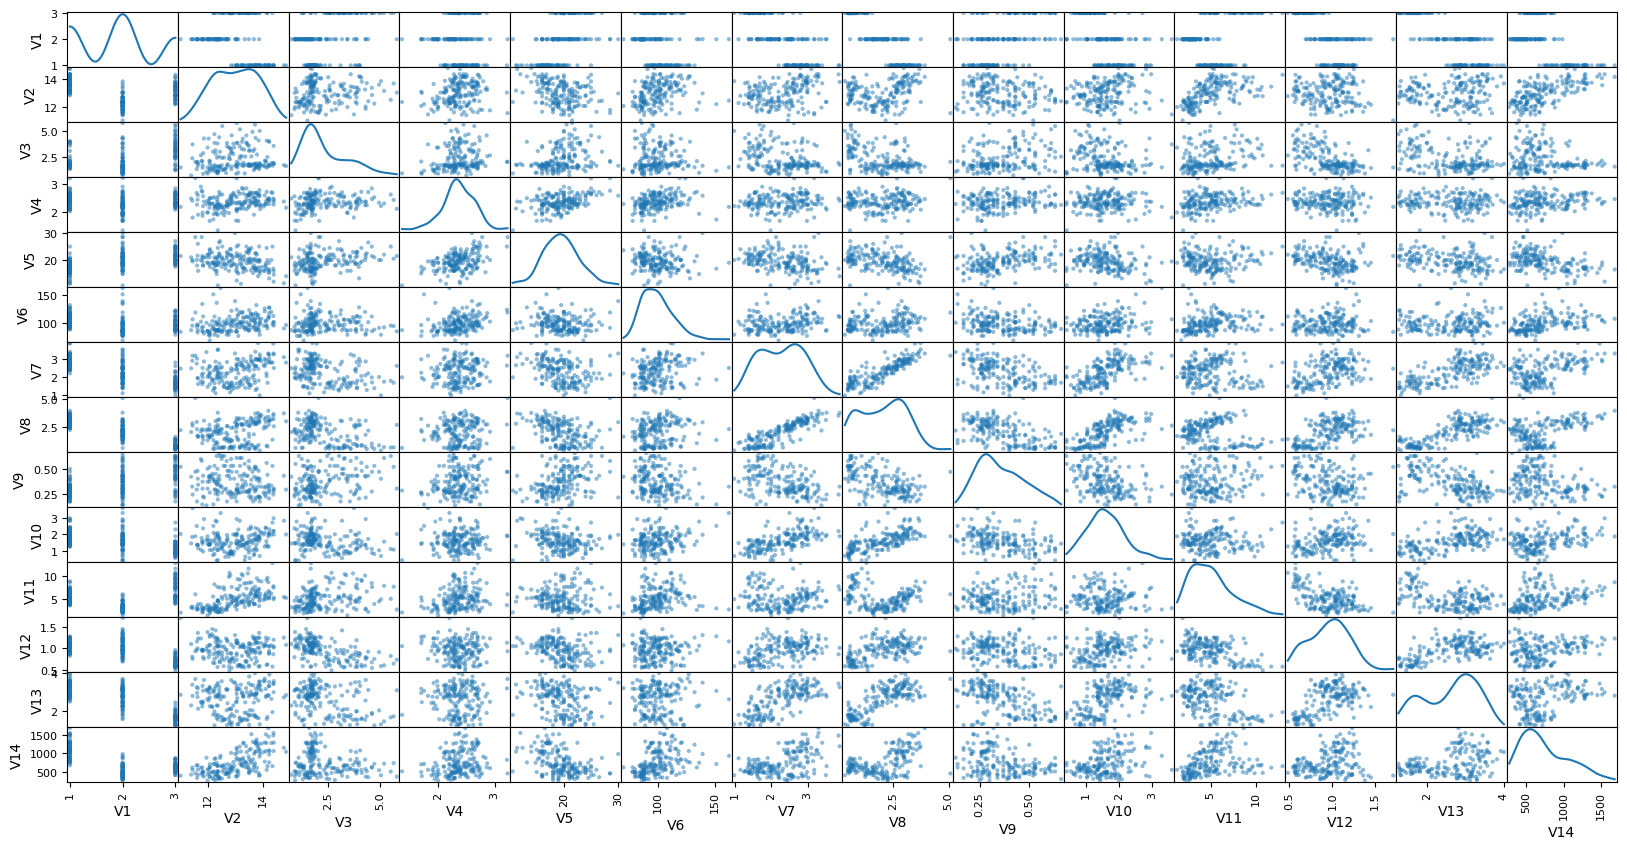

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.plotting.scatter_matrix(dataset, diagonal="kde", figsize=(20,10))
plt.show()

##  separar los datos

In [25]:
# Separar las características (features) del target
X = dataset.drop('V1', axis=1)  # Asegúrate de que 'V1' es el nombre de tu columna objetivo
y = dataset['V1']


## dividimos los datos en trainning y test

In [30]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

In [31]:
print("x_train: ", x_train.shape)
print("x_test: ", x_test.shape)
print("y_train: ", y_train.shape)
print("y_test: ", y_test.shape)

x_train:  (142, 13)
x_test:  (36, 13)
y_train:  (142,)
y_test:  (36,)


## Normalizamos los datos

In [32]:
# Estandarizar los datos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

## Aplicar LDA

In [33]:
# Aplicar LDA
lda = LDA(n_components=2)  # Podemos proyectar a un espacio de 2 dimensiones para visualización
X_lda = lda.fit_transform(x_train, y_train)
x_test = lda.transform(x_test)


# Obtener los coeficientes (loadings)
coefficients = pd.DataFrame(lda.scalings_, index=X.columns, columns=['LD1', 'LD2'])
coefficients

,LD1,LD2
V2,-0.252484,0.618085
V3,0.194618,0.420868
V4,-0.093176,0.605092
V5,0.499890,-0.520900
V6,0.005731,-0.001419
V7,0.634021,-0.104575
V8,-2.200525,-0.197956
V9,-0.257124,-0.070884
V10,0.201938,-0.309612
V11,0.625563,0.601955


## Visualización de los Discriminantes

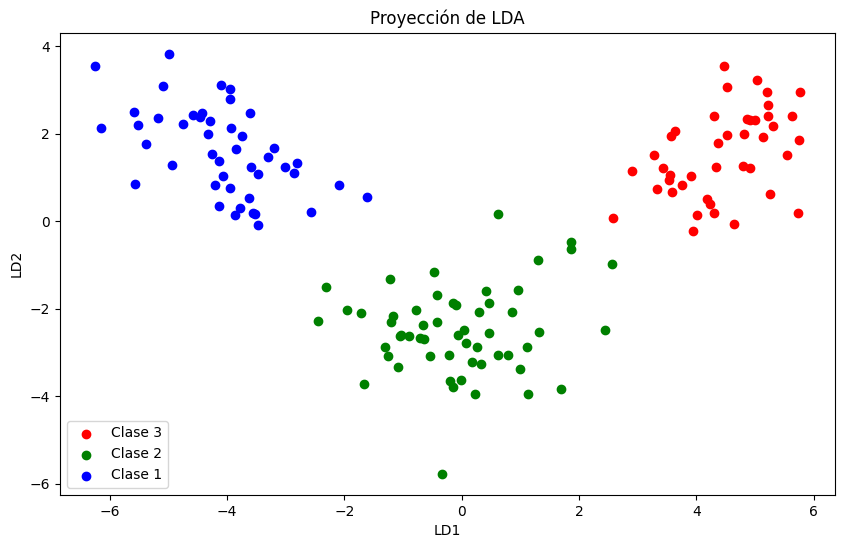

In [34]:
# Crear un DataFrame con los resultados LDA y la columna objetivo
lda_df = pd.DataFrame(X_lda, columns=['LD1', 'LD2'])
lda_df['Target'] = y_train.values

# Plotear las clases en el espacio de los discriminantes lineales
plt.figure(figsize=(10, 6))
colors = ['r', 'g', 'b']
for label, color in zip(lda_df['Target'].unique(), colors):
    plt.scatter(lda_df.loc[lda_df['Target'] == label, 'LD1'],
                lda_df.loc[lda_df['Target'] == label, 'LD2'],
                label=f'Clase {label}',
                c=color)

plt.xlabel('LD1')
plt.ylabel('LD2')
plt.title('Proyección de LDA')
plt.legend()
plt.show()

Probar el funcionamiento con una regresion logistica

In [35]:
X_lda

array([[ 3.57315552,  1.94018924],
       [ 0.85475898, -2.08182977],
       [ 0.62173655, -3.06234453],
       [ 4.80786412,  2.00638739],
       [-3.8579759 ,  0.14987256],
       [-3.59455458,  1.24961706],
       [-0.53772906, -3.0852704 ],
       [ 0.04058577, -2.47312446],
       [ 0.99835348, -3.36989668],
       [-3.74095658,  1.94844242],
       [ 3.76035226,  0.82126218],
       [-0.15106412, -1.86820292],
       [ 3.62762899,  2.05460026],
       [-3.94229781,  2.80328429],
       [ 3.33429017,  0.73627798],
       [ 3.90206871,  1.03276135],
       [-3.55835472,  0.18783108],
       [ 5.63175281,  2.40524214],
       [-5.56217254,  0.85694946],
       [ 0.23296188, -3.94615581],
       [ 5.03141997,  3.23313754],
       [ 3.52861651,  0.94605778],
       [-1.17815662, -2.17294825],
       [ 3.58320131,  0.67947364],
       [ 5.21649905,  2.41090952],
       [-3.01647841,  1.24411621],
       [ 1.86178658, -0.47484926],
       [ 3.93816398, -0.2204059 ],
       [-1.0836235 ,

In [36]:
from sklearn.linear_model import LogisticRegression
clasificador = LogisticRegression(random_state=0)
clasificador.fit(X_lda, y_train)
y_pred = clasificador.predict(x_test)

regersion lineal

In [37]:
y_pred

array([1, 3, 2, 1, 2, 2, 1, 3, 2, 2, 3, 3, 1, 2, 3, 2, 1, 1, 2, 1, 2, 1,
       1, 2, 2, 2, 2, 2, 2, 3, 1, 1, 2, 1, 1, 1])

In [38]:
print(y_test)

54     1
151    3
63     2
55     1
123    2
121    2
7      1
160    3
106    2
90     2
141    3
146    3
5      1
98     2
168    3
80     2
33     1
18     1
61     2
51     1
66     2
37     1
4      1
104    2
60     2
111    2
126    2
86     2
112    2
164    3
26     1
56     1
129    2
45     1
8      1
44     1
Name: V1, dtype: int64


Validar los aciertos con una matriz de confusion

In [39]:
# Crear la matriz de confusión
from sklearn.metrics import confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred)
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lda.classes_)


In [40]:
cm

array([[14,  0,  0],
       [ 0, 16,  0],
       [ 0,  0,  6]])

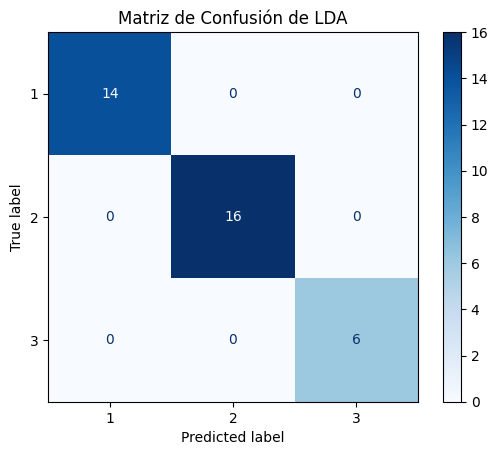

In [41]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Visualizar la matriz de confusión
cmd.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión de LDA')
plt.show()

# Diferencias entre LDA y PCA

## PCA (Principal Component Analysis):

Objetivo Principal: Identificar las direcciones (componentes principales) en las cuales los datos varían más. Es una técnica no supervisada que no considera la variable objetivo (clase) en su cálculo.

Finalidad: Maximizar la varianza de los datos proyectados en el nuevo espacio, lo que significa encontrar las componentes principales que explican la mayor parte de la varianza total de los datos.


##LDA (Linear Discriminant Analysis):

Objetivo Principal: Encontrar las direcciones que maximizan la separación (discriminación) entre las clases. Es una técnica supervisada que considera la variable objetivo (clase) en su cálculo.

Finalidad: Maximizar la varianza entre las clases y minimizar la varianza dentro de cada clase, lo que significa encontrar las componentes lineales que mejor separan las diferentes clases.

##Cálculo y Componentes

**PCA:**

Componentes: Componentes principales son combinaciones lineales de las características originales y están ordenadas por la cantidad de varianza explicada.

Cálculo: Se basa en la descomposición en valores singulares (SVD) de la matriz de datos o en la descomposición en autovalores/autovectores de la matriz de covarianza de los datos.

**LDA:**

Componentes: Discriminantes lineales son combinaciones lineales de las características originales que mejor separan las clases. El número de discriminantes lineales es al menos uno menos que el número de clases.
Cálculo: Se basa en la maximización de la razón de la varianza entre clases a la varianza dentro de clases, resolviendo un problema de autovalores/autovectores para la matriz de dispersión.
